Pregunta II – Revenue Management (25 pts)
1) En la planilla Excel data_crucero.xlsx se muestran las valoraciones (máxima disposición a
pagar) de los clientes que han respondido la encuesta de cuanto valoran el crucero.
Basado en estos datos:

a. Construya la curva de demanda, que indique la probabilidad que un cliente
compre un paquete que se vende a un precio P. Para esto, debe calcular la
fracción de clientes que tiene una valoración igual o menor a P, para distintos
valores de P.

b. Usando la curva de demanda calculada, calcule el precio óptimo que maximiza el
ingreso esperado cuando tiene un numero ilimitado de paquetes para vender.

c. Considere ahora el caso en que vende durante 5 días seguidos, y cada día llegan
en promedio 15 clientes. Se busca maximizar el ingreso esperado. ¿Que precio
fijaría el primer día si solo cuenta con 30 paquetes para vender durante los 5
días?

d. Esta por iniciarse el quinto día de ventas y le quedan 10 piezas. ¿Que precio
fijaría si su objetivo es maximizar el ingreso esperado?

In [16]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('data_crucero.xlsx')

### Construcción de la curva de demanda

In [ ]:
df_demanda = pd.DataFrame({'precio':[],'cantidad':[]})
total_cantidad = df.shape[0]
precios_unicos = df['Precio'].unique()

for precio in precios_unicos:
    contador=df[df['Precio']>=precio].count()[0] #cuántos valoran más que p 
    df_demanda.loc[len(df_demanda),]= [precio,contador/total_cantidad*100] 



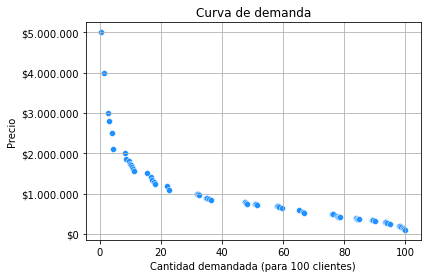

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df_demanda, x='cantidad', y='precio', color='dodgerblue', marker='o',)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${int(x):,}".replace(",", ".")))
plt.title('Curva de demanda')
plt.xlabel('Cantidad demandada (para 100 clientes)')
plt.ylabel('Precio')
plt.grid()
plt.show() 

### Cálculo Ingreso Total

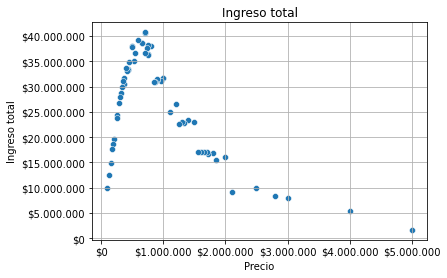

In [22]:
df_demanda['ingreso'] = df_demanda['precio'] * df_demanda['cantidad']
sns.scatterplot(data=df_demanda, x='precio', y='ingreso')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${int(x):,}".replace(",", ".")))
plt.title('Ingreso total')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${int(x):,}".replace(",", ".")))
plt.xlabel('Precio')
plt.ylabel('Ingreso total')
plt.grid()
plt.show()

<AxesSubplot:xlabel='cantidad', ylabel='ingreso'>

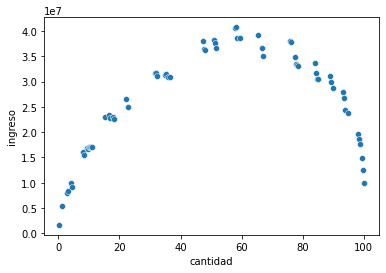

In [5]:
sns.scatterplot(data=df_demanda, x='cantidad', y='ingreso')

### Maximización del Ingreso Total, cálculo de P y Q óptimo

In [6]:
# Precio que maximiza el ingreso
precio_max_ingreso = df_demanda.loc[df_demanda['ingreso'].idxmax(), 'precio']
print(f"El precio que maximiza el ingreso es: {precio_max_ingreso}")
# cantidad dado el precio que maximiza
cantidad_max_ingreso = df_demanda.loc[df_demanda['ingreso'].idxmax(), 'cantidad']
print(f"La cantidad demandada al precio que maximiza el ingreso es: {cantidad_max_ingreso}")
#y el ingreso máximo es de
ingreso_maximo = df_demanda['ingreso'].max()
print(f"El ingreso máximo es: {ingreso_maximo}")

El precio que maximiza el ingreso es: 699990.0
La cantidad demandada al precio que maximiza el ingreso es: 58.19397993311036
El ingreso máximo es: 40735204.01337792


### Demanda para 75 clientes potenciales y restricción de 30 paquetes

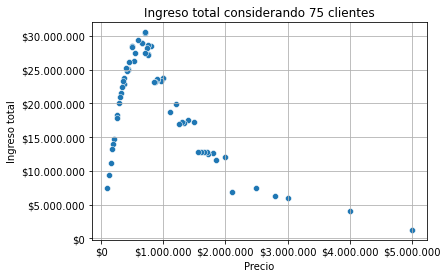

In [23]:
df_demanda['cantidad_75'] = df_demanda['cantidad']*0.75  # demanda para 75 clientes
df_demanda['ingreso_75'] = df_demanda['cantidad_75'] * df_demanda['precio']
sns.scatterplot(data=df_demanda, x='precio', y='ingreso_75')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${int(x):,}".replace(",", ".")))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${int(x):,}".replace(",", ".")))
plt.title('Ingreso total considerando 75 clientes')
plt.xlabel('Precio')
plt.ylabel('Ingreso total')
plt.grid()
plt.show()

In [24]:
# Precio que maximiza el ingreso
precio_max_ingreso = df_demanda.loc[df_demanda['ingreso_75'].idxmax(), 'precio']
print(f"El precio que maximiza el ingreso es: {precio_max_ingreso}")
# cantidad dado el precio que maximiza
cantidad_max_ingreso = df_demanda.loc[df_demanda['ingreso_75'].idxmax(), 'cantidad_75']
print(f"La cantidad demandada al precio que maximiza el ingreso es: {cantidad_max_ingreso}")
#y el ingreso máximo es de
ingreso_maximo = df_demanda['ingreso_75'].max()
print(f"El ingreso máximo es: {ingreso_maximo}")

El precio que maximiza el ingreso es: 699990.0
La cantidad demandada al precio que maximiza el ingreso es: 43.64548494983277
El ingreso máximo es: 30551403.01003344


In [26]:
# Precio que maximiza el ingreso condicional a 30 paquetes a vender
df_demanda30 = df_demanda[df_demanda['cantidad_75'] <= 30]

precio_max_ingreso = df_demanda30.loc[df_demanda30['ingreso_75'].idxmax(), 'precio']
print(f"El precio que maximiza el ingreso es: {precio_max_ingreso}")
# cantidad dado el precio que maximiza
cantidad_max_ingreso = df_demanda30.loc[df_demanda30['ingreso_75'].idxmax(), 'cantidad_75']
print(f"La cantidad demandada al precio que maximiza el ingreso es: {cantidad_max_ingreso}")
#y el ingreso máximo es de
ingreso_maximo = df_demanda30['ingreso_75'].max()
print(f"El ingreso máximo es: {ingreso_maximo}")

El precio que maximiza el ingreso es: 990000.0
La cantidad demandada al precio que maximiza el ingreso es: 24.080267558528426
El ingreso máximo es: 23839464.882943142


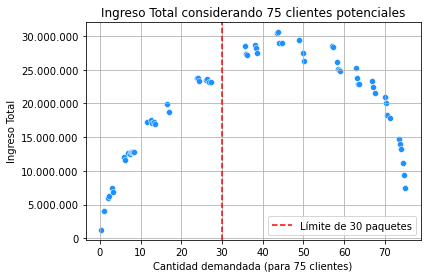

In [32]:
sns.scatterplot(data=df_demanda, x='cantidad_75', y='ingreso_75', color='dodgerblue', marker='o')
#linea vertical en x=30
plt.axvline(x=30, color='red', linestyle='--', label='Límite de 30 paquetes')
plt.legend()
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))
plt.title('Ingreso Total considerando 75 clientes potenciales')
plt.xlabel('Cantidad demandada (para 75 clientes)')
plt.ylabel('Ingreso Total')
plt.grid()
plt.show()

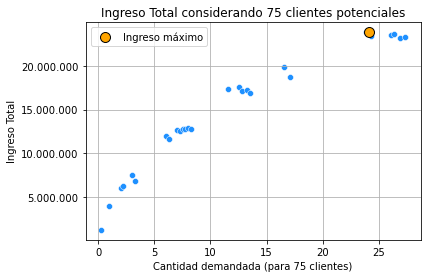

In [37]:
sns.scatterplot(data=df_demanda30, x='cantidad_75', y='ingreso_75', color='dodgerblue', marker='o')
#cambia de color el valor máximo de ingreso
max_ingreso = df_demanda30['ingreso_75'].max()
max_cantidad = df_demanda30.loc[df_demanda30['ingreso_75'].idxmax(), 'cantidad_75']
plt.scatter(max_cantidad, max_ingreso, color='orange', label='Ingreso máximo', s=100, edgecolor='black')
plt.legend()
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))
plt.title('Ingreso Total considerando 75 clientes potenciales')
plt.xlabel('Cantidad demandada (para 75 clientes)')
plt.ylabel('Ingreso Total')
plt.grid()
plt.show()

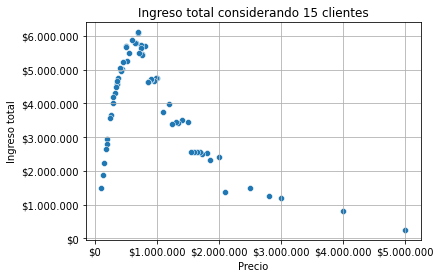

In [36]:
df_demanda['cantidad_15'] = df_demanda['cantidad']*0.15  # demanda para 75 clientes
df_demanda['ingreso_15'] = df_demanda['cantidad_15'] * df_demanda['precio']
sns.scatterplot(data=df_demanda, x='precio', y='ingreso_15')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${int(x):,}".replace(",", ".")))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${int(x):,}".replace(",", ".")))
plt.title('Ingreso total considerando 15 clientes')
plt.xlabel('Precio')
plt.ylabel('Ingreso total')
plt.grid()
plt.show()

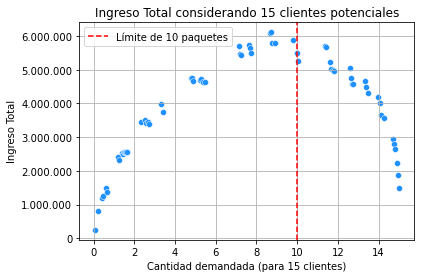

In [44]:
sns.scatterplot(data=df_demanda, x='cantidad_15', y='ingreso_15', color='dodgerblue', marker='o')
#linea vertical en x=30
plt.axvline(x=10, color='red', linestyle='--', label='Límite de 10 paquetes')
plt.legend()
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))
plt.title('Ingreso Total considerando 15 clientes potenciales')
plt.xlabel('Cantidad demandada (para 15 clientes)')
plt.ylabel('Ingreso Total')
plt.grid()
plt.show()

In [39]:
# Precio que maximiza el ingreso condicional a 30 paquetes a vender
df_demanda10 = df_demanda[df_demanda['cantidad_15'] <= 10]

precio_max_ingreso = df_demanda10.loc[df_demanda10['ingreso_15'].idxmax(), 'precio']
print(f"El precio que maximiza el ingreso es: {precio_max_ingreso}")
# cantidad dado el precio que maximiza
cantidad_max_ingreso = df_demanda10.loc[df_demanda10['ingreso_15'].idxmax(), 'cantidad_15']
print(f"La cantidad demandada al precio que maximiza el ingreso es: {cantidad_max_ingreso}")
#y el ingreso máximo es de
ingreso_maximo = df_demanda10['ingreso_15'].max()
print(f"El ingreso máximo es: {ingreso_maximo}")

El precio que maximiza el ingreso es: 699990.0
La cantidad demandada al precio que maximiza el ingreso es: 8.729096989966553
El ingreso máximo es: 6110280.602006688


### Cálculo de ratio crítico y número de paquetes a guardar para la última semana

In [40]:
Cu=1300000-500000
Co=500000
F=Cu/(Co+Cu)
print(F)

0.6153846153846154


In [42]:
# inversa poisson evaluada en probabilidad 0.61
from scipy.stats import poisson
lambda_value = 12  # valor de lambda
k = poisson.ppf(F, lambda_value)

print(f"dado el newsvendor cost de 0.61 y la poisson con media 12 el número de pasajes a guardar para la última semana es de: {k}")

dado el newsvendor cost de 0.61 y la poisson con media 12 el número de pasajes a guardar para la última semana es de: 13.0
